## Load the dataset

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("xAPI-Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Data cleaning & preprocessing

## handel missing values

In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df.dropna(inplace=True)  # Or use df.fillna(method='ffill') for forward fill

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


## Convert categorial Columns

In [3]:
# Label Encoding for binary columns
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].map({'Yes': 1, 'No': 0})
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].map({'Yes': 1, 'No': 0})
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].map({'Under-7': 0, 'Above-7': 1})
# One-Hot Encoding for multiclass columns
df = pd.get_dummies(df, columns=['NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation'])
df.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,NationalITy_Egypt,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum
0,1,15,16,2,20,1,NaN,0,M,False,...,False,True,False,False,False,False,True,False,True,False
1,1,20,20,3,25,1,NaN,0,M,False,...,False,True,False,False,False,False,True,False,True,False
2,1,10,7,0,30,0,NaN,1,L,False,...,False,True,False,False,False,False,True,False,True,False
3,1,30,25,5,35,0,NaN,1,L,False,...,False,True,False,False,False,False,True,False,True,False
4,1,40,50,12,50,0,NaN,1,M,False,...,False,True,False,False,False,False,True,False,True,False


## Noramalize Numeric Columns

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #This creates an instance of the MinMaxScaler.The default behavior is to scale values to the range [0, 1].
 
df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']] = scaler.fit_transform(
    df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']]
)

df.head() #The result is that all values in these columns are now between 0 and 1.

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,NationalITy_Egypt,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum
0,1,0.15,0.161616,0.020408,0.193878,1,NaN,0,M,False,...,False,True,False,False,False,False,True,False,True,False
1,1,0.20,0.202020,0.030612,0.244898,1,NaN,0,M,False,...,False,True,False,False,False,False,True,False,True,False
2,1,0.10,0.070707,0.000000,0.295918,0,NaN,1,L,False,...,False,True,False,False,False,False,True,False,True,False
3,1,0.30,0.252525,0.051020,0.346939,0,NaN,1,L,False,...,False,True,False,False,False,False,True,False,True,False
4,1,0.40,0.505051,0.122449,0.500000,0,NaN,1,M,False,...,False,True,False,False,False,False,True,False,True,False


## Data Insights and  Visulization

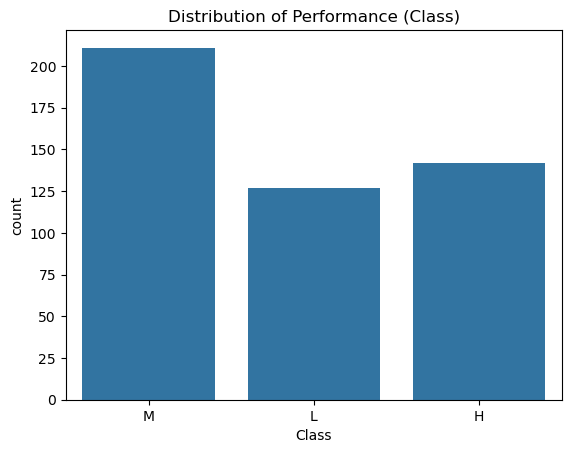

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of final grades
sns.countplot(x='Class', data=df)
plt.title('Distribution of Performance (Class)')
plt.show()

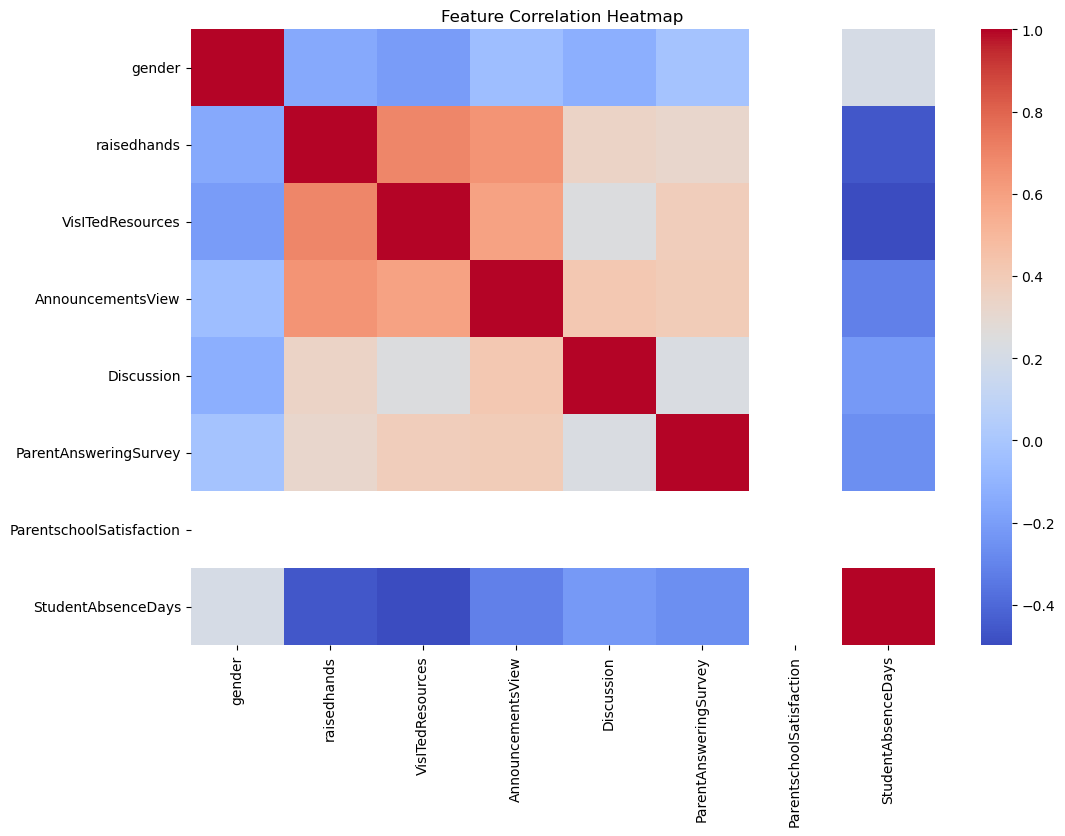

In [7]:
 # Use only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

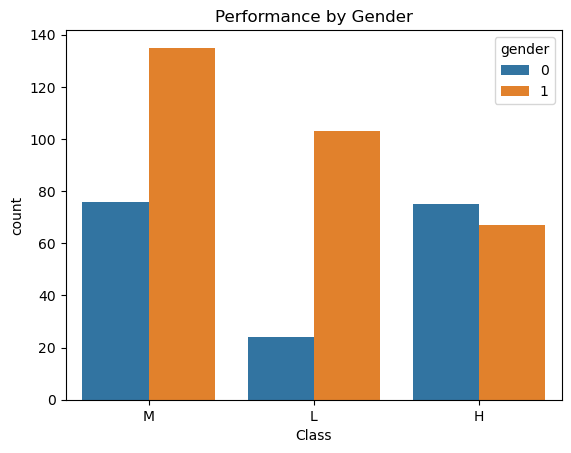

In [8]:
# Group comparison: Gender vs Performance
sns.countplot(x='Class', hue='gender', data=df)
plt.title("Performance by Gender")
plt.show()